Zomato data analysis project

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('Zomato data .csv')

In [7]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


convert the datatypr of rate column

In [9]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handlerate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


type of resturant

In [11]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

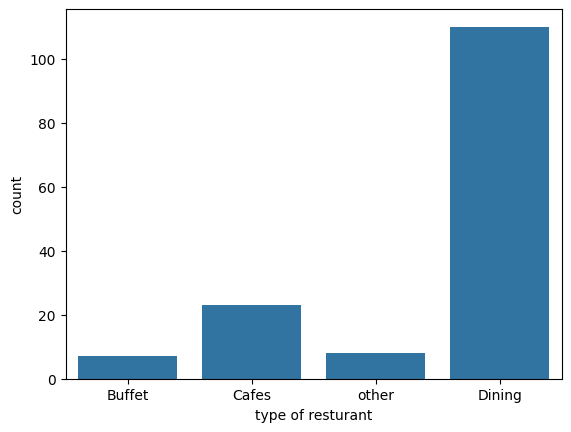

In [14]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("type of resturant")

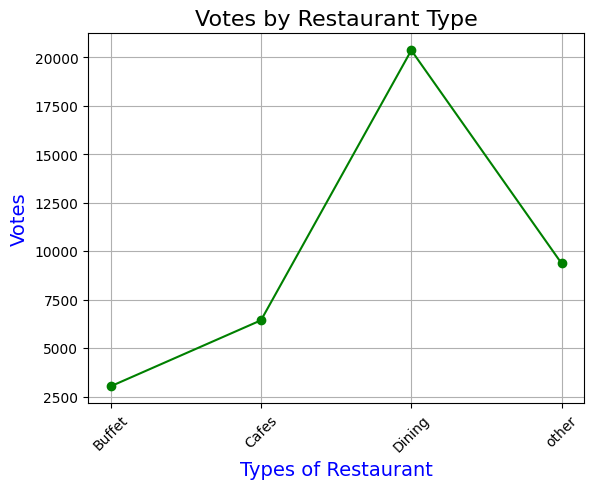

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by restaurant type and sum votes
grouped_data = df.groupby('listed_in(type)')['votes'].sum().reset_index()

# Create a DataFrame (optional, already done by reset_index)
result = pd.DataFrame(grouped_data)

# Plot the data
plt.plot(result['listed_in(type)'], result['votes'], c="green", marker='o')

# Label axes and title
plt.xlabel("Types of Restaurant", color="blue", fontsize=14)
plt.ylabel("Votes", color="blue", fontsize=14)
plt.title("Votes by Restaurant Type", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


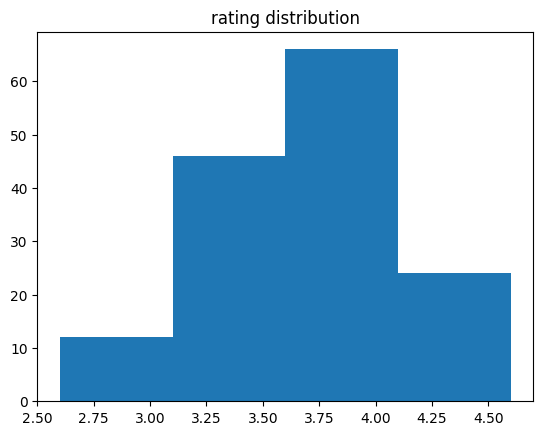

In [26]:
plt.hist(df['rate'],bins= 4)
plt.title("rating distribution")
plt.show()

average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

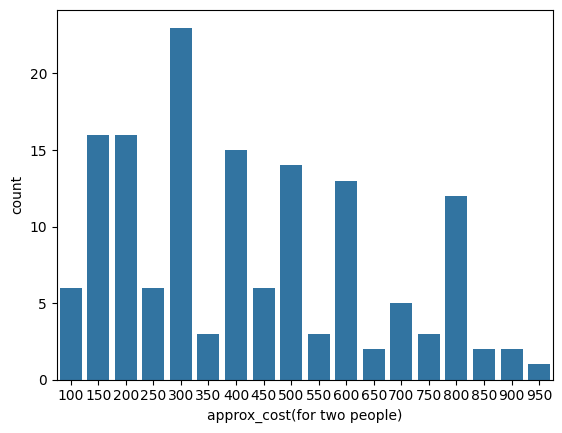

In [28]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

which mode recieves maximum rating

In [29]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

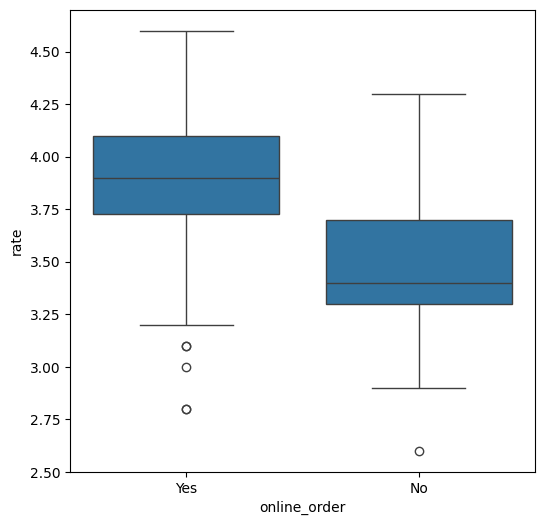

In [33]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data=df)

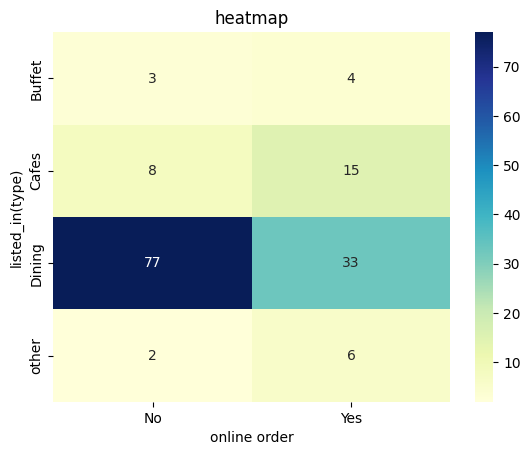

In [38]:
pivot_table = df.pivot_table(index='listed_in(type)', columns = 'online_order', aggfunc = 'size',fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap= "YlGnBu", fmt = 'd')
plt.title("heatmap")
plt.xlabel("online order")
plt.ylabel("listed_in(type)")
plt.show()